In [52]:
#https://towardsdatascience.com/what-people-write-about-climate-twitter-data-clustering-in-python-2fbbd2b95906
import pandas as pd 
path = r'C:\Users\karol\projects\plos\plosOnePsychologyTitles.csv'
data = pd.read_csv(path, names=['titleText'])
data.head()

titleText
0  The link between childhood psychological maltr...
1  Need for affect, need for cognition, and the d...
2  The dominance of introspective measures and wh...
3  Does the psychological profile influence the p...
4  The effect of perceived interracial competitio...

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52365 entries, 0 to 52364
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titleText  52365 non-null  object
dtypes: object(1)
memory usage: 409.2+ KB


# Data cleaning

In [54]:
data[data['titleText'].duplicated(keep=False)].sort_values('titleText').head(8)

titleText
12318  "My wife's mistrust. That's the saddest part o...
12298  "My wife's mistrust. That's the saddest part o...
11900  "That's what you do for people you love": A qu...
11894  "That's what you do for people you love": A qu...
36033  16SrDNA Pyrosequencing of the Mediterranean Go...
35970  16SrDNA Pyrosequencing of the Mediterranean Go...
43309  3D membrane segmentation and quantification of...
43277  3D membrane segmentation and quantification of...

In [55]:
data = data.drop_duplicates('titleText')

After running the model for the first time, the top cluster turned out to be made of titles like this:

2946	plos computational biology issue image vol 711 november 2011	21
4175	plos computational biology issue image vol 104 april 2014	21
5674	plos computational biology issue image vol 185 may 2022	21
8789	plos computational biology issue image vol 192 march 2023	21
8903	plos computational biology issue image vol 91 january 2013	21
...	...	...
48689	plos neglected tropical diseases issue image vol 1512 december 2021	21
48768	plos biology issue image vol 74 april 2009	21
49160	plos genetics issue image vol 148 august 2018	21
49264	plos genetics issue image vol 68 august 2010	21
49440	plos biology issue image vol 137 july 2015	21

We need to delete these image titles.

It's probably safe to delete any title with a string "issue image vol" as you wouldn't find this in a real publication title.

In [64]:
#Finding exact string to delete

#data.info()
import re
# Define the pattern
pattern = r'\bvol\b'
# Find the index of the first occurrence of "vol"
for text in data['titleText']:
    # Check if the pattern is found in the text
    if re.search(pattern, text, flags=re.IGNORECASE):
        # Print the text and break the loop
        print(text)
        break


#Issue Image | Vol.

PLoS Computational Biology Issue Image | Vol. 7(11) November 2011


In [65]:
data = data[~data['titleText'].str.contains('Issue Image | Vol.')]

In [66]:
data.info()#down to 49762 rows

<class 'pandas.core.frame.DataFrame'>
Index: 49762 entries, 0 to 52364
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titleText  49762 non-null  object
dtypes: object(1)
memory usage: 777.5+ KB


In [8]:
#example of how spacy works
import spacy

nlp = spacy.load('en_core_web_sm')

s = "I saw two mice today!"

print(" ".join([token.lemma_ for token in nlp(s)]))
# > I see two mouse today !

I see two mouse today !


In [9]:
def lemmatize(sentence: str) -> str:
    # Convert all words in sentence to lemmatized form 
    return " ".join([token.lemma_ for token in nlp(sentence)])

In [10]:
print(lemmatize(s))

I see two mouse today !


In [17]:
import re
def remove_punctuation(text):
    # Remove punctuation marks except apostrophes inside words
    cleaned_text = re.sub(r'[^\w\s\']', '', text)
    return cleaned_text

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

def remove_stopwords(text) -> str:
   #Remove stopwords from text """
    filtered_words = [word for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def text_clean(text: str) -> str:
    try:
        output = re.sub(r'[^\w\s\']', '', text)
        output = lemmatize(output)#Remove punctuation marks except apostrophes inside words
        output = remove_stopwords(output)  # Remove stopwords
        return output.lower().strip() 
    except:
        return ""
data['textClean'] = data['titleText'].apply(text_clean)
#data['textClean'] = data['titleText'].map(text_clean)
# In this modified code, I replaced the map() method with the apply() 
# method to ensure that the assignment is made to the original DataFrame 
# instead of a view or copy. 
# This should prevent the warning from appearing.

C:\Users\karol\AppData\Local\Temp\ipykernel_7012\2443868084.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['textClean'] = data['titleText'].apply(text_clean)


In [19]:
data.head()

titleText  \
0  The link between childhood psychological maltr...   
1  Need for affect, need for cognition, and the d...   
2  The dominance of introspective measures and wh...   
3  Does the psychological profile influence the p...   
4  The effect of perceived interracial competitio...   

                                           textClean  
0  link childhood psychological maltreatment cybe...  
1     need affect need cognition desire independence  
2  dominance introspective measure imply example ...  
3  psychological profile influence position promi...  
4  effect perceive interracial competition psycho...

                                              0.0/151.4 kB ? eta -:--:--
     ------------------------------         122.9/151.4 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00
  Using cached Pillow-9.5.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
                                              0.0/470.9 kB ? eta -:--:--
     ---------                              112.6/470.9 kB 3.2 MB/s eta 0:00:01
     -------------------                    235.5/470.9 kB 2.9 MB/s eta 0:00:01
     -----------------------------          368.6/470.9 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 470.9/470.9 kB 2.7 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/1.9 MB ? eta -:--:--
     --                                       0.1/1.9 MB 3.2 MB/s eta 0:00:01
     -----                              

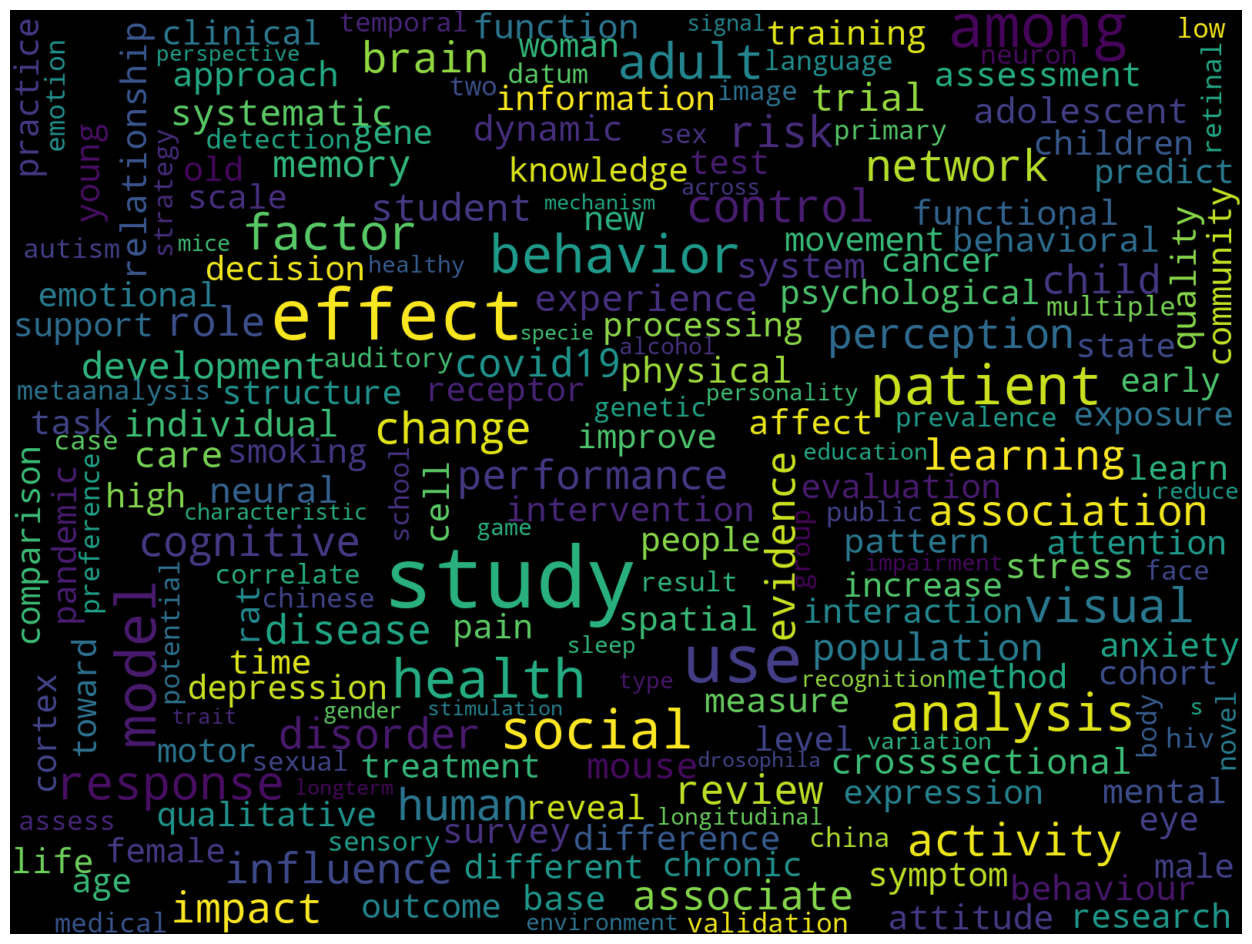

In [21]:
#just for fun wordcloud
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

def draw_cloud(column: pd.Series, stopwords=None):
    all_words = ' '.join([text for text in column]) 
    
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()
    
    
draw_cloud(data['textClean'])

## Vectorization

### TF-IDF (Term Frequency-Inverse Document Frequency) 
The TF-IDF result is based on a numerical statistic, where the TF (term frequency) is the number of times the word appeared in the document (in our case, in the tweet), and the IDF (inverse document frequency) shows how often the same word appears in the text corpus (full set of documents).

In [24]:
!pip install -U scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
#example

docs = ["climate change . information about climate important", 
        "my cat cute . love cat"]

tfidf = TfidfVectorizer()
vectorized_docs_ex = tfidf.fit_transform(docs).todense()

print("Shape:", vectorized_docs_ex.shape)
display(pd.DataFrame(vectorized_docs_ex, columns=tfidf.get_feature_names_out()))

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Shape: (2, 9)


about       cat    change   climate      cute  important  information  \
0  0.353553  0.000000  0.353553  0.707107  0.000000   0.353553     0.353553   
1  0.000000  0.755929  0.000000  0.000000  0.377964   0.000000     0.000000   

       love        my  
0  0.000000  0.000000  
1  0.377964  0.377964

In [26]:

import numpy as np
docs = data["textClean"].values

tfidf = TfidfVectorizer()
vectorized_docs_tfidf = np.asarray(tfidf.fit_transform(docs).todense())

print("Shape:", vectorized_docs_tfidf.shape)

Shape: (50074, 44702)


### Word2Vec
Probably the most famous example of using this model is the relationship between the words “king”, “man” and “queen”. Those who are interested in details can read this nice article.

For our task, I will be using a pre-trained vector file. This model was trained using the Google News dataset; the file contains vectors for 3 million words and phrases. 

In [34]:
#!pip install gensim
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#pre-trained model downloaded here
#"C:\Users\karol\Downloads\GoogleNews-vectors-negative300.bin.gz"
#gzip -d GoogleNews-vectors-negative300.bin.gz
# Path to google news vectors
google_news_path = r"C:\Users\karol\Downloads\GoogleNews-vectors-negative300.bin"

# Load google news vecs in gensim
word_vectors = KeyedVectors.load_word2vec_format(google_news_path, binary=True)


#word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

print("Shape:", word_vectors["climate"].shape)


Shape: (300,)


In [35]:
display(word_vectors["climate"])

array([ 0.17871094,  0.32617188, -0.11865234,  0.12060547, -0.15527344,
       -0.2109375 ,  0.00460815, -0.03881836, -0.0067749 ,  0.16796875,
        0.02294922, -0.08203125, -0.12988281, -0.09814453, -0.02966309,
        0.20703125, -0.22070312,  0.34765625,  0.14550781, -0.20898438,
        0.00286865,  0.1796875 , -0.11132812, -0.04956055, -0.03588867,
       -0.07275391, -0.0859375 , -0.07910156,  0.09277344, -0.00193787,
       -0.01220703, -0.09228516, -0.12060547,  0.20410156, -0.0378418 ,
       -0.06201172, -0.09130859, -0.02746582,  0.09130859,  0.06298828,
        0.04418945, -0.11083984, -0.12597656,  0.390625  , -0.13085938,
       -0.08154297,  0.11914062,  0.12451172, -0.46484375,  0.22949219,
        0.0456543 ,  0.05834961, -0.30859375, -0.27148438, -0.13085938,
       -0.07617188, -0.14160156, -0.12011719, -0.13085938, -0.05615234,
       -0.23828125,  0.02368164, -0.13183594, -0.05395508,  0.07470703,
       -0.07177734,  0.26171875,  0.11181641,  0.06689453,  0.03

Using Word2Vec, we can get embeddings for each word, but we need an embedding for the whole tweet. As the easiest approach, we can use the word embedding arithmetic and get the mean of all vectors:

In [36]:
from nltk import word_tokenize


def word2vec_vectorize(text: str):
    """ Convert text document to the embedding vector """    
    vectors = []
    tokens = word_tokenize(text)
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
            
    return np.asarray(vectors).mean(axis=0) if len(vectors) > 0 else np.zeros(word_vectors.vector_size)

In [39]:
docs = data["textClean"].values
vectorized_docs = np.array([word2vec_vectorize(doc) for doc in docs])
#vectorized_docs = list(map(word2vec_vectorize, docs))
print("Shape:", vectorized_docs.shape)

Shape: (50074, 300)


## Sentence-BERT
Bidirectional Encoder Representations from Transformer

This works because words with similar meanings are converted into close vectors. With this method, we can convert all our tweets into embedding vectors:

In [30]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer


docs = ['the influence of human activity on the warming of the climate system has evolved from theory to established fact', 
        'cats can jump 5 times their own height']

model = SentenceTransformer('all-MiniLM-L6-v2')
vectorized_docs = model.encode(np.asarray(docs))

print("Shape:", vectorized_docs.shape)

                                              0.0/86.0 kB ? eta -:--:--
     --------------                           30.7/86.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 86.0/86.0 kB 970.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/7.2 MB ? eta -:--:--
                                              0.0/7.2 MB 991.0 kB/s eta 0:00:08
                                              0.1/7.2 MB 1.3 MB/s eta 0:00:06
                                              0.2/7.2 MB 1.1 MB/s eta 0:00:07
     -                                        0.2/7.2 MB 1.1 MB/s eta 0:00:07
     -                                        0.3/7.2 MB 1.3 MB/s eta 0:00:06
     --                                       0.4/7.2 MB 1.3 MB/s eta 0:00:06
     --                                       0.4/7.2 MB 1.3 MB/s eta 0:00:06
     --                                       0

Shape: (2, 384)


In [31]:
docs = data['titleText'].values
vectorized_docs = model.encode(np.asarray(docs))
print("Shape:", vectorized_docs.shape)

Shape: (50074, 384)


## Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def make_clustered_dataframe(x: np.array, k: int) -> pd.DataFrame:
    """ Create a new dataframe with original docs and assigned clusters """
    #ids = df["id"].values
    #user_names = df["user_name"].values
    docs = data["textClean"].values
    tokenized_docs = data["textClean"].map(text_to_tokens).values
    n_init_value = 10
    #kmeans = KMeans(n_clusters=5, n_init=n_init_value)
    km = KMeans(n_clusters=k, n_init=n_init_value).fit(x)
    s_score = silhouette_score(x, km.labels_)
    print(f"K={k}: Silhouette coefficient {s_score:0.2f}, inertia:{km.inertia_}")
    
    # Create new DataFrame
    data_len = x.shape[0]
    df_clusters = pd.DataFrame({
        #"id": ids[:data_len],
        #"user": user_names[:data_len],
        "text": docs[:data_len],
        "tokens": tokenized_docs[:data_len],
        "cluster": km.labels_,
    })
    return df_clusters


def text_to_tokens(text: str) -> list[str]:
    """ Generate tokens from the sentence """
    # "this is text" => ['this', 'is' 'text']
    tokens = word_tokenize(text)  # Get tokens from text
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


# Make clustered dataframe
k = 30
df_clusters = make_clustered_dataframe(vectorized_docs, k)
with pd.option_context('display.max_colwidth', None):
    display(df_clusters)

K=30: Silhouette coefficient 0.01, inertia:52423.4046357295


text  \
0      link childhood psychological maltreatment cyberbullye perpetration attitude among undergraduate test risk protective factor   
1                                                                                   need affect need cognition desire independence   
2                                                             dominance introspective measure imply example environmental attitude   
3                                                             psychological profile influence position promise young futsal player   
4                                                                    effect perceive interracial competition psychological outcome   
...                                                                                                                            ...   
50069                                                                              predict recognition cell receptor epitope tcrgp   
50070                                    cognitive impairment syphilis treatment base cerebrospinal fluid analysis improve outcome   
50071                                                         multimodal neuroimage marker variation cognitive ability old hiv man   
50072                                                                              cortisol patterns associate cell activation hiv   
50073                                                     factor aids dementia complex trial design results lessons abacavir trial   

                                                                                                                                          tokens  \
0      [link, childhood, psychological, maltreatment, cyberbullye, perpetration, attitude, among, undergraduate, test, risk, protective, factor]   
1                                                                                          [need, affect, need, cognition, desire, independence]   
2                                                                   [dominance, introspective, measure, imply, example, environmental, attitude]   
3                                                                  [psychological, profile, influence, position, promise, young, futsal, player]   
4                                                                           [effect, perceive, interracial, competition, psychological, outcome]   
...                                                                                                                                          ...   
50069                                                                                     [predict, recognition, cell, receptor, epitope, tcrgp]   
50070                                       [cognitive, impairment, syphilis, treatment, base, cerebrospinal, fluid, analysis, improve, outcome]   
50071                                                             [multimodal, neuroimage, marker, variation, cognitive, ability, old, hiv, man]   
50072                                                                                     [cortisol, patterns, associate, cell, activation, hiv]   
50073                                                        [factor, aids, dementia, complex, trial, design, results, lessons, abacavir, trial]   

       cluster  
0           26  
1            8  
2            8  
3           15  
4            8  
...        ...  
50069        6  
50070       20  
50071       12  
50072       13  
50073       20  

[50074 rows x 3 columns]

Inertia can be used to measure clustering quality. It is calculated by measuring the distance between all cluster points and cluster centroids, and the lower the value, the better. Another useful metric is the silhouette score; this value has a range of [-1, 1]. If the value is close to 1, the clusters are well separated; if the value is about 0, the distance is not significant; and if the values are negative, the clusters are overlapping.

 display the top clusters, sorted by silhouette score. I use the SciKit-learn silhouette_samples method to calculate this. I will also use a word cloud to visualize each cluster:

Cluster 21: Size:123, avg:0.45, min:0.02, max: 0.54
Cluster 2: Size:2126, avg:0.06, min:0.01, max: 0.14
Cluster 15: Size:853, avg:0.04, min:-0.05, max: 0.16
Cluster 17: Size:2619, avg:0.03, min:-0.03, max: 0.12
Cluster 27: Size:1363, avg:0.03, min:-0.04, max: 0.15
Cluster 11: Size:999, avg:0.03, min:-0.06, max: 0.14
Cluster 9: Size:1842, avg:0.03, min:-0.06, max: 0.11
Cluster 24: Size:2103, avg:0.03, min:-0.04, max: 0.11
Cluster 28: Size:1461, avg:0.03, min:-0.03, max: 0.13
Cluster 25: Size:1277, avg:0.02, min:-0.03, max: 0.12
Cluster 23: Size:947, avg:0.02, min:-0.06, max: 0.11
Cluster 1: Size:1136, avg:0.02, min:-0.07, max: 0.15
Cluster 19: Size:827, avg:0.02, min:-0.06, max: 0.16
Cluster 6: Size:827, avg:0.02, min:-0.06, max: 0.15
Cluster 7: Size:2566, avg:0.02, min:-0.04, max: 0.11
Cluster 20: Size:1790, avg:0.01, min:-0.07, max: 0.13
Cluster 12: Size:2396, avg:0.01, min:-0.04, max: 0.08
Cluster 26: Size:2208, avg:0.01, min:-0.05, max: 0.09
Cluster 13: Size:1781, avg:0.01, min:-0.0

text  \
2946          plos computational biology issue image vol 711 november 2011   
4175             plos computational biology issue image vol 104 april 2014   
5674               plos computational biology issue image vol 185 may 2022   
8789             plos computational biology issue image vol 192 march 2023   
8903            plos computational biology issue image vol 91 january 2013   
...                                                                    ...   
48689  plos neglected tropical diseases issue image vol 1512 december 2021   
48768                           plos biology issue image vol 74 april 2009   
49160                        plos genetics issue image vol 148 august 2018   
49264                         plos genetics issue image vol 68 august 2010   
49440                           plos biology issue image vol 137 july 2015   

       cluster  
2946        21  
4175        21  
5674        21  
8789        21  
8903        21  
...        ...  
48689       21  
48768       21  
49160       21  
49264       21  
49440       21  

[123 rows x 2 columns]

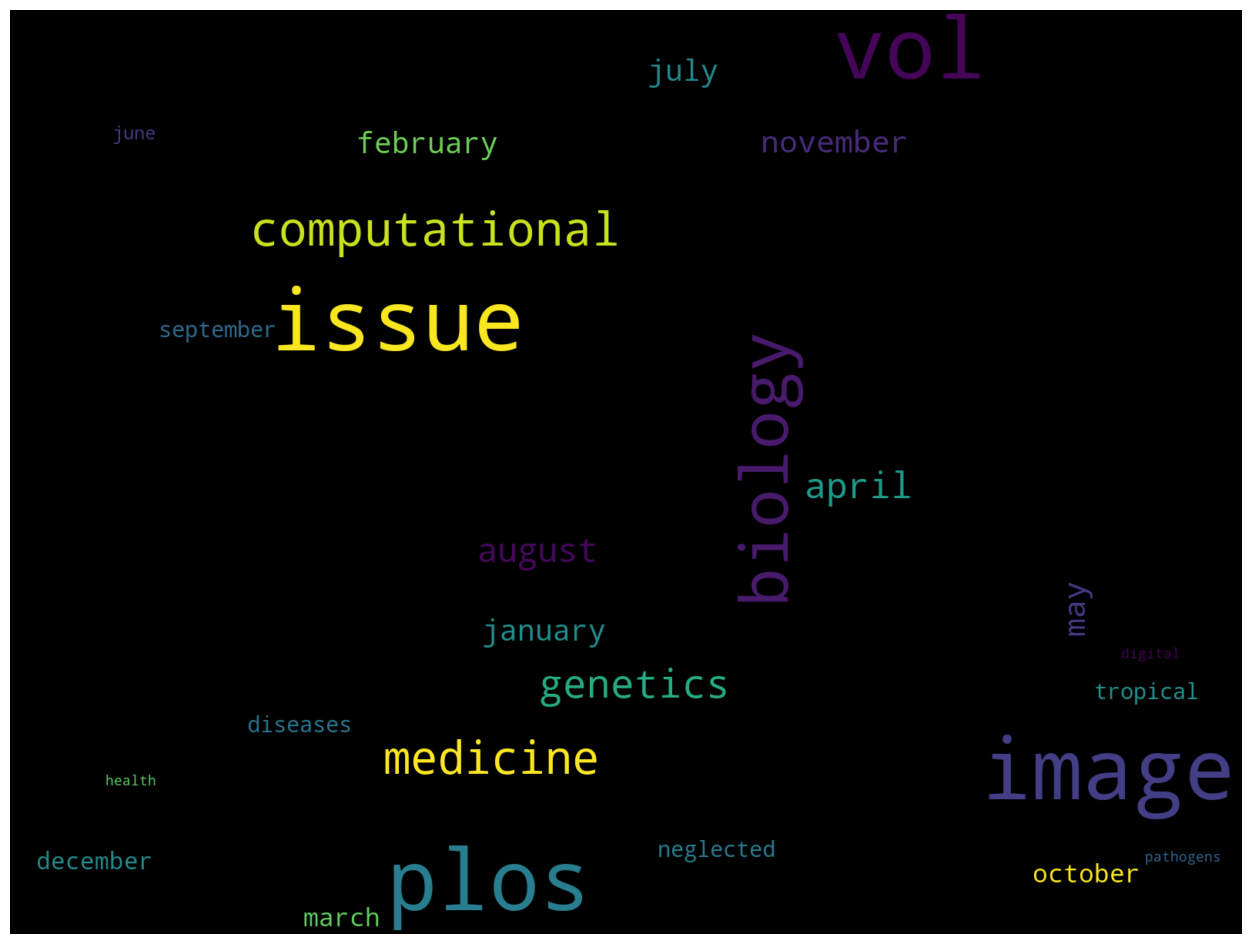

[('plos', 123),
 ('issue', 122),
 ('image', 122),
 ('vol', 122),
 ('biology', 66),
 ('computational', 29),
 ('medicine', 27),
 ('genetics', 20),
 ('april', 17),
 ('august', 15)]

text  \
99                   association smartphone use sleep quality psychological distress loneliness among health care student worker saudi arabia   
121                          good psychometric properties addiction version revised illness perception questionnaire health care professional   
183    use prosocial behavior safeguard mental health foster emotional wellbeing covid19 pandemic registered report protocol randomized trial   
270                                           impact psychological capital job burnout chinese nurses mediator role organizational commitment   
336          critical care staff respond organisational challenge qualitative exploration personality type cognitive processing critical care   
...                                                                                                                                       ...   
49491           neurological manifestation chronic hepatitis c patient receive care reference hospital subsaharan africa crosssectional study   
49560                                    pattern vitreoretinal disease university gondar tertiary eye care training center northwest ethiopia   
49727                                           knowledge hepatitis c status moderate relationship history drug treatment sterile syringe use   
49932                                                  hepatitis c cascade care among hiv infected patient call address ongoing barriers care   
50061                          impact methadone maintenance therapy access regular physician care regard hepatitis c among people inject drug   

       cluster  
99           2  
121          2  
183          2  
270          2  
336          2  
...        ...  
49491        2  
49560        2  
49727        2  
49932        2  
50061        2  

[2126 rows x 2 columns]

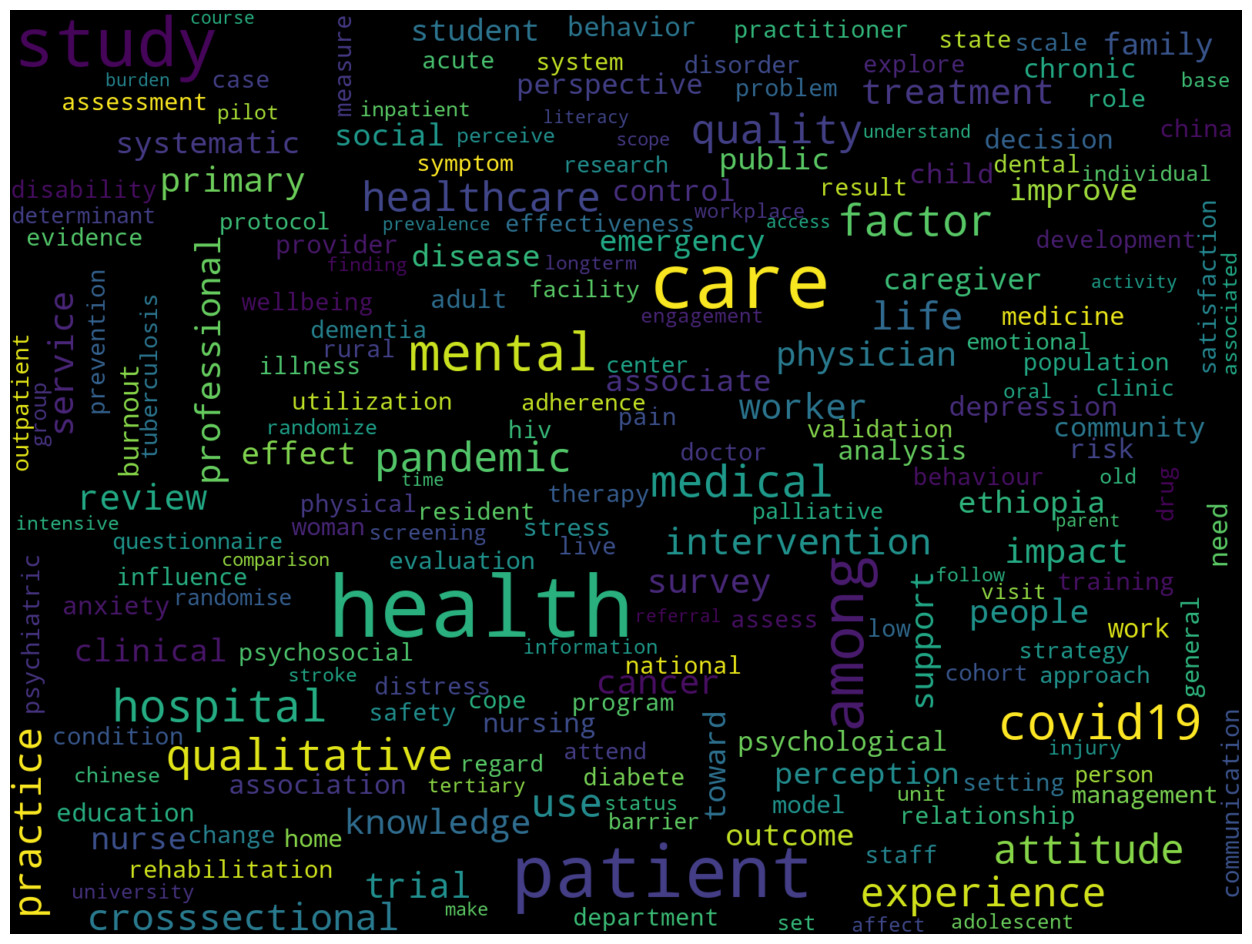

[('health', 767),
 ('care', 606),
 ('patient', 490),
 ('study', 477),
 ('among', 358),
 ('mental', 274),
 ('covid19', 233),
 ('hospital', 187),
 ('medical', 185),
 ('qualitative', 179)]

text  \
3                                                                            psychological profile influence position promise young futsal player   
13                                                                                      type personality stress cope performance novel sport task   
21                                                                                         management succession success professional soccer team   
34                                                                         personality characteristic competitive anxiety individual team athlete   
36                                                     speak negative psychological tetrad sport probabilistic bayesian study competitive sailing   
...                                                                                                                                           ...   
48611                                                                    model record score snatch variation longterm training young weightlifter   
48622  four week augmented eccentric loading use novel leg press device improve leg strength welltraine athlete professional sprint track cyclist   
48692                                                                          knee hip agonistantagonist relationship male under19 soccer player   
49189                        effect knee alignment quadriceps femoris muscularity crosssectional comparison train versus untrained individual sex   
49957                                                     helper cellrelate change peripheral blood induce progressive effort among soccer player   

       cluster  
3           15  
13          15  
21          15  
34          15  
36          15  
...        ...  
48611       15  
48622       15  
48692       15  
49189       15  
49957       15  

[853 rows x 2 columns]

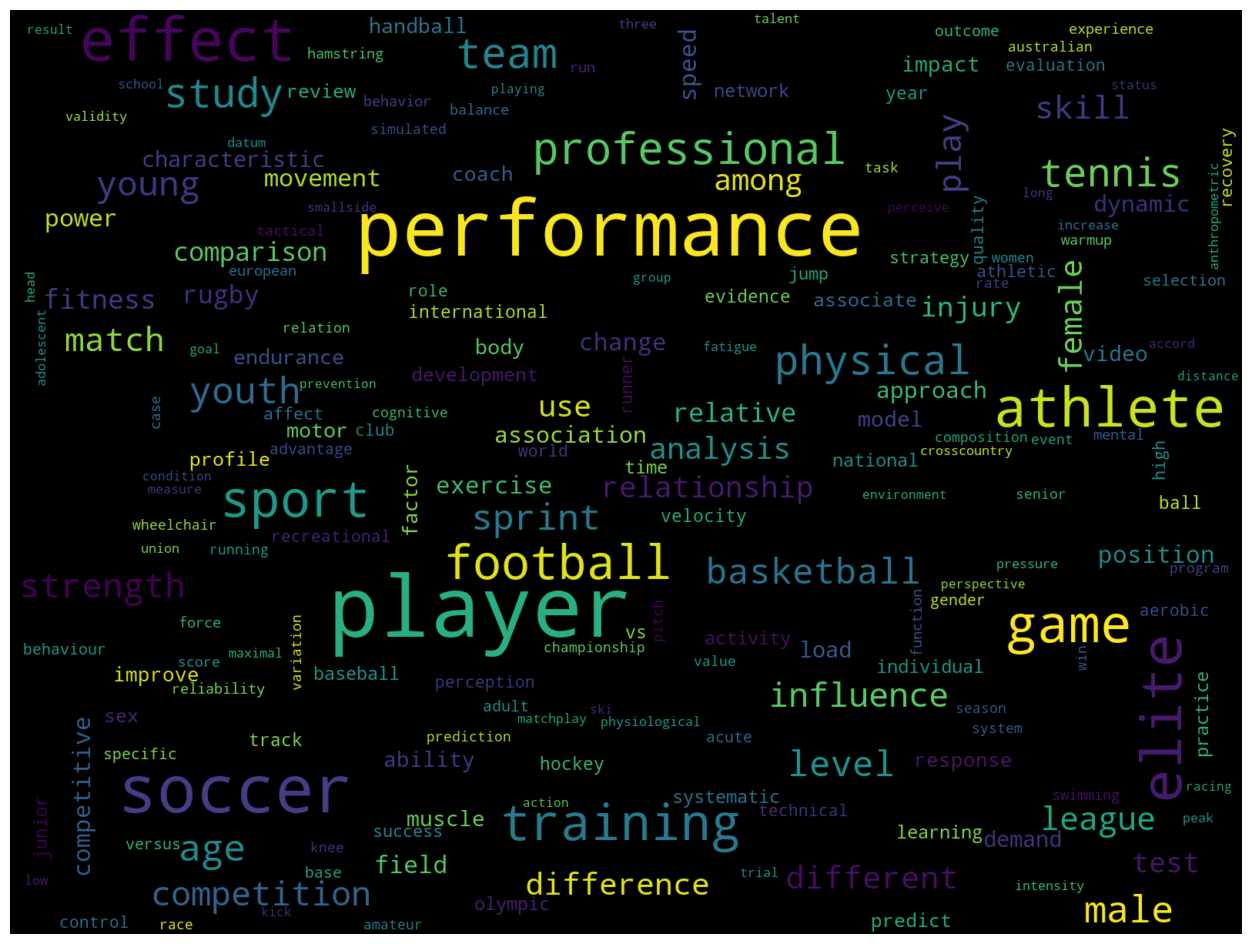

[('performance', 210),
 ('player', 202),
 ('soccer', 148),
 ('effect', 112),
 ('elite', 109),
 ('athlete', 85),
 ('training', 85),
 ('football', 75),
 ('game', 74),
 ('sport', 69)]

text  \
106    relationship problem gamble excessive gaming psychological distress spending loot box aotearoa new zealand australia united statesa crossnational survey   
192                                                                                  individualismcollectivism associate selfcontrol evidence chinese us sample   
195                                                                                                      prevalence determinant onlinesex use german population   
199                     psychological distress among people live chronic medical illness general population northwest ethiopia comparative crosssectional study   
235                                   eight personal characteristics associated power live disaster indicate survivor 2011 great east japan earthquake disaster   
...                                                                                                                                                         ...   
50015                                                                          burden liver disease among communitybased people inject drugs pwid chennai india   
50022                                                                     venuebased network may underpin hcv transmission amongst hivinfected gay bisexual men   
50043                                         audio computerassisted selfinterview acasi useful risk behaviour assessment female male sex workers mombasa kenya   
50044                                                 change poultry handling behavior poultry mortality reporting among rural cambodians areas affect hpaih5n1   
50066                                               economic recession emergence hiv1 outbreak among drug injectors athens metropolitan area longitudinal study   

       cluster  
106         17  
192         17  
195         17  
199         17  
235         17  
...        ...  
50015       17  
50022       17  
50043       17  
50044       17  
50066       17  

[2619 rows x 2 columns]

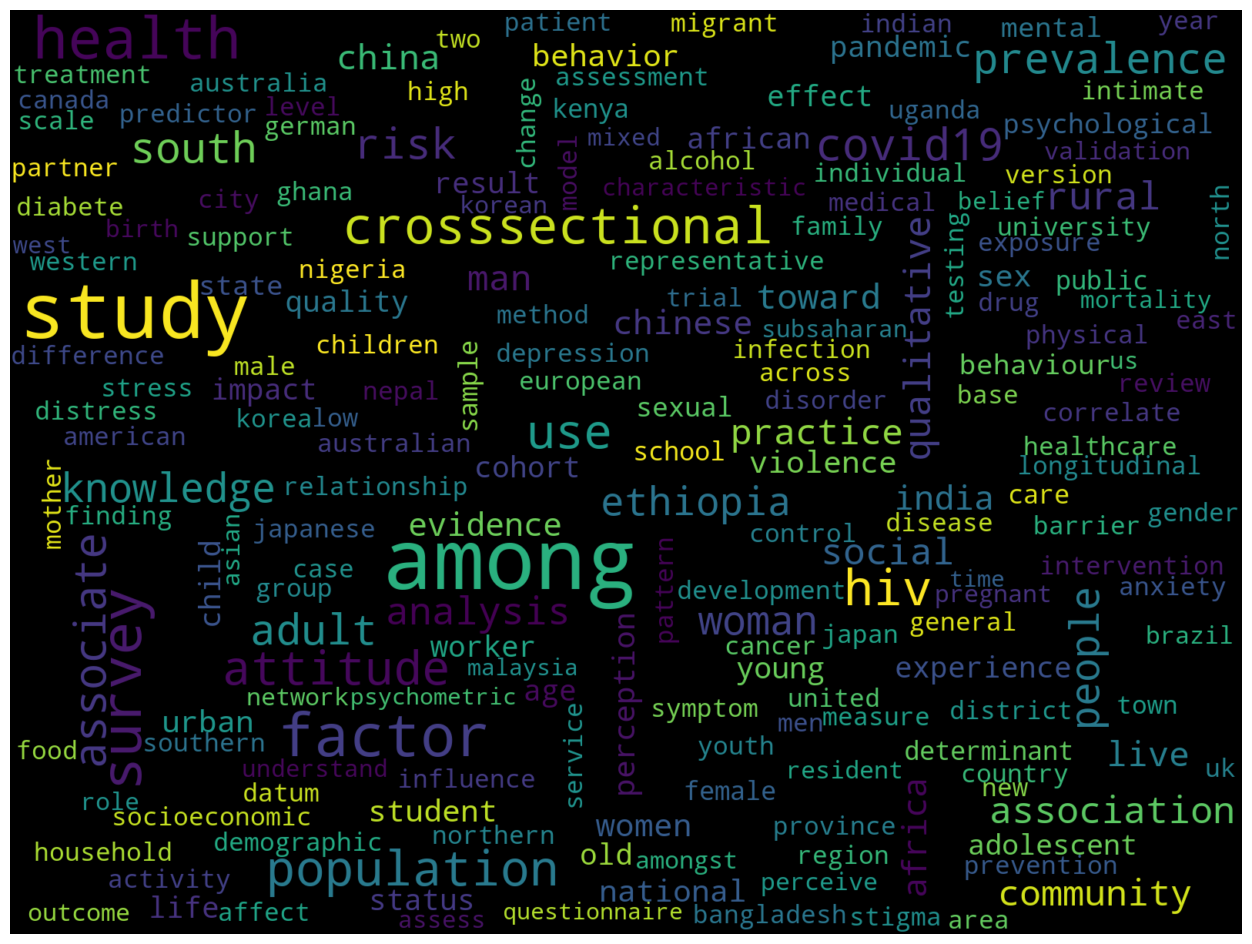

[('among', 829),
 ('study', 673),
 ('health', 333),
 ('factor', 330),
 ('survey', 307),
 ('crosssectional', 256),
 ('hiv', 244),
 ('use', 228),
 ('population', 228),
 ('covid19', 204)]

text  \
42                                                   latent class analysis approach identification doctoral student risk attrition   
68                      influence student personality leisure behaviour choice moderate effect academic efficacy exploratory study   
90                                           academic dishonesty among university student role psychopathy motivation selfefficacy   
118                              diagnostic criteria problematic internet use among us university students mixedmethods evaluation   
137                                                          sport psychology performance metaanalyse systematic review literature   
...                                                                                                                            ...   
46534                                                                      examination school reopening strategy sarscov2 pandemic   
47335                           give receive something sex crosssectional study transactional sex among ugandan university student   
47641              soccerbase promotion voluntary medical male circumcision mixedmethod feasibility study secondary student uganda   
47678                                     transactional sex among nigerian university student role family structure family support   
48761  confront historical legacy biological anthropology south africarestitution redress communitycentere science sutherland nine   

       cluster  
42          27  
68          27  
90          27  
118         27  
137         27  
...        ...  
46534       27  
47335       27  
47641       27  
47678       27  
48761       27  

[1363 rows x 2 columns]

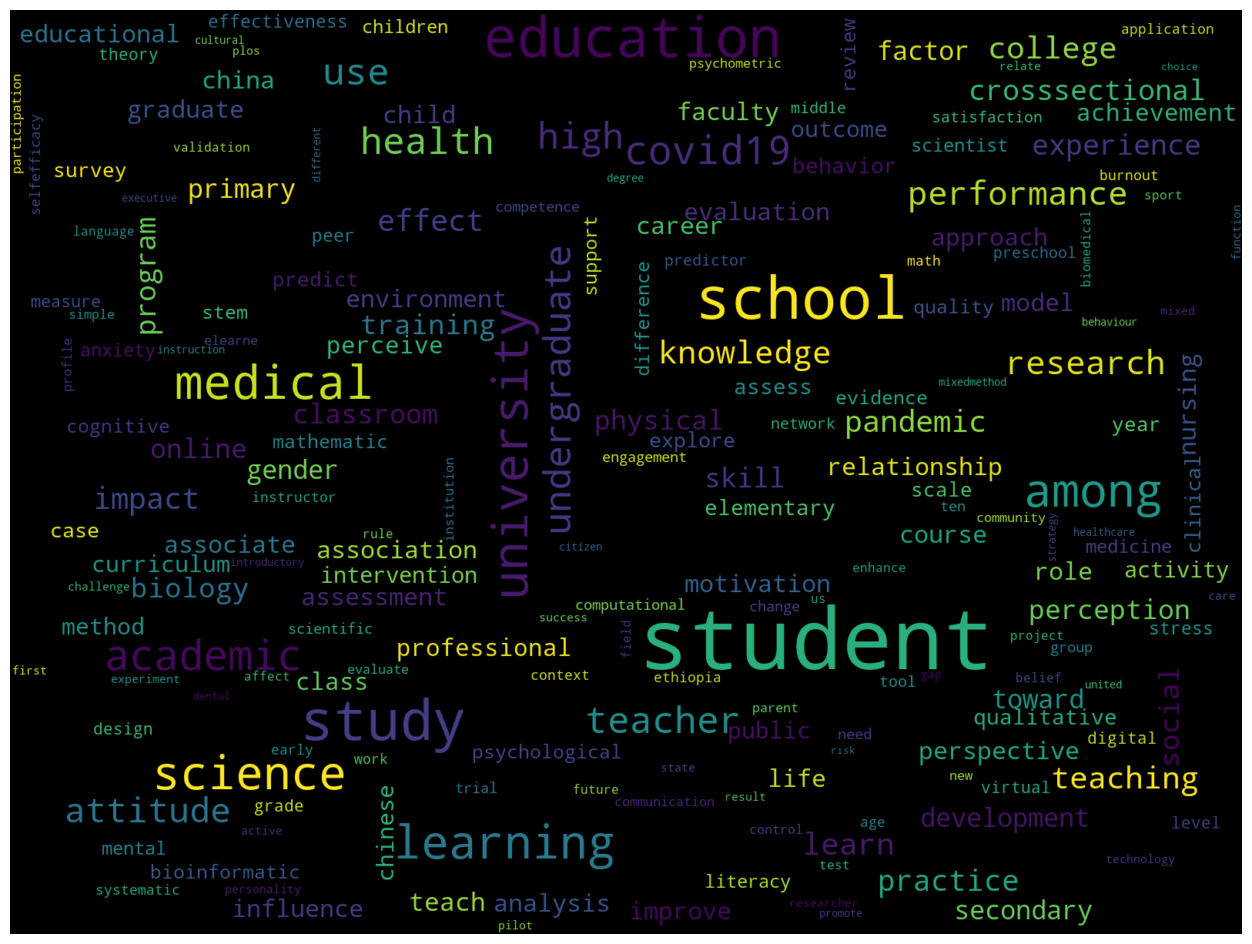

[('student', 567),
 ('school', 240),
 ('study', 222),
 ('education', 220),
 ('university', 167),
 ('medical', 157),
 ('learning', 153),
 ('among', 151),
 ('science', 144),
 ('academic', 123)]

text  \
189                                                     trend suicidology personality endophenotype molecular genetic investigations   
1294                         affiliative behavior ultrasonic communication social reward influence genetic variation adolescent mice   
1328                          single nucleotide polymorphism neuropeptide bw receptor1 gene influences evaluation facial expressions   
1544                                                         variation xlinked efhc2 gene associate social cognitive abilities males   
2102           functional gene polymorphisms serotonin system traumatic life event modulate neural basis fear acquisition extinction   
...                                                                                                                              ...   
49955                                                                         ciliacarta integrate validated compendium ciliary gene   
49964  screen olfactory gene relate bloodfeeding behavior culex pipien quinquefasciatus culex pipien molestus transcriptome analysis   
50041                    application endocrine biomarker update information reproductive physiology gray whale eschrichtius robustus   
50056                                         meloxicam blocks neuroinflammation depressivelike behaviors hiv1 transgenic female rat   
50059                                               distinct epigenetic effects tobacco smoking whole blood among leukocyte subtypes   

       cluster  
189         11  
1294        11  
1328        11  
1544        11  
2102        11  
...        ...  
49955       11  
49964       11  
50041       11  
50056       11  
50059       11  

[999 rows x 2 columns]

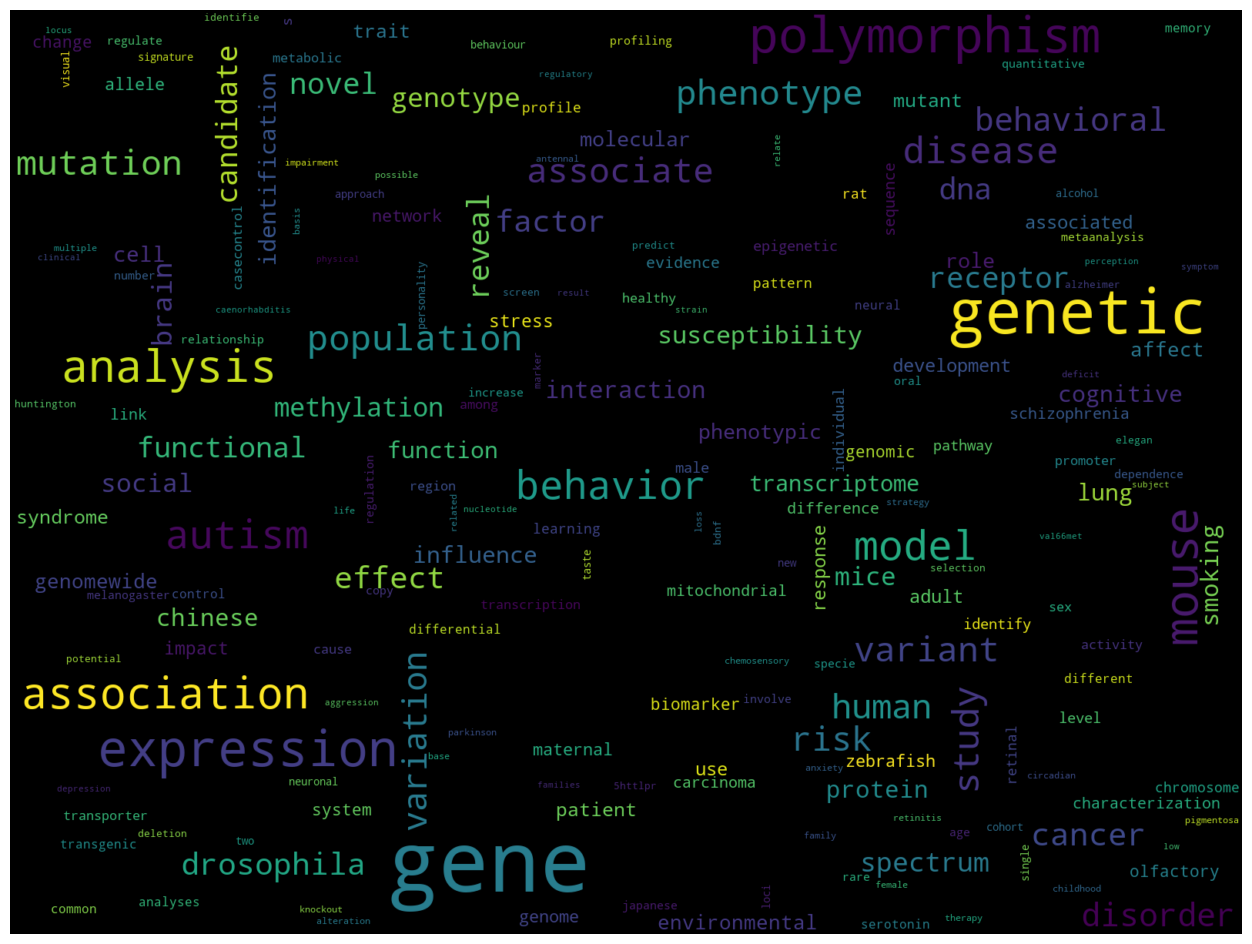

[('gene', 370),
 ('genetic', 192),
 ('expression', 122),
 ('mouse', 105),
 ('analysis', 97),
 ('association', 85),
 ('autism', 76),
 ('genes', 74),
 ('polymorphism', 73),
 ('model', 73)]

text  \
404                                                                                      effect illegal open dump urban forest landscape appreciation   
953                                                        highintensity sensory consumption fill resource scarcity boundary condition selfacceptance   
1289                             motivationbased calving facility social cognitive factor influence isolation seek behaviour holstein dairy cow calve   
1664                              effect view winter forest landscape ground tree cover snow psychological relaxation young finnish adult pilot study   
1797                                         value personality trait livestock herd kelpiesdevelopment application livestock herd dog assessment form   
...                                                                                                                                               ...   
49738                                                eye state asymmetry aquatic unihemispheric slow wave sleep northern fur seal callorhinus ursinus   
49870                              effect demographic social environmental characteristic pathogen prevalence wild felid across gradient urbanization   
49893  water quality assessment mosquito breeding habitat base dissolve organic matter chlorophyll measurement laserinduced fluorescence spectroscopy   
49901                                                                                                     growth dynamics australia 's polar dinosaur   
49972                                                                      mosquito host selection vary seasonally host availability mosquito density   

       cluster  
404          9  
953          9  
1289         9  
1664         9  
1797         9  
...        ...  
49738        9  
49870        9  
49893        9  
49901        9  
49972        9  

[1842 rows x 2 columns]

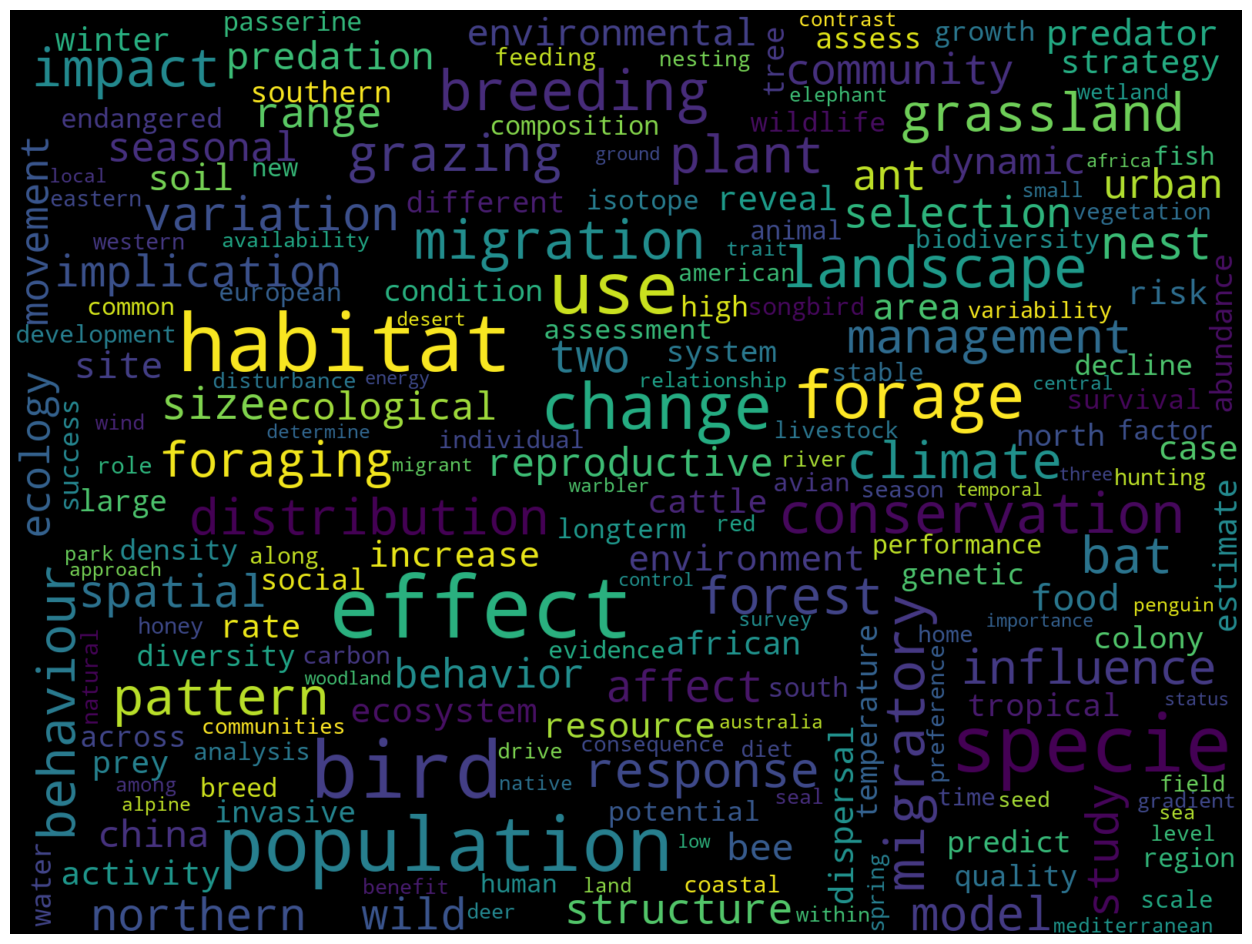

[('habitat', 171),
 ('use', 149),
 ('effect', 144),
 ('population', 137),
 ('bird', 126),
 ('species', 119),
 ('forage', 116),
 ('change', 95),
 ('conservation', 87),
 ('breeding', 87)]

In [45]:
from sklearn.metrics import silhouette_samples
from collections import Counter


def show_clusters_info(x: np.array, k: int, cdf: pd.DataFrame):
    """ Print clusters info and top clusters """
    labels = cdf["cluster"].values
    sample_silhouette_values = silhouette_samples(x, labels)
    
    # Get silhouette values per cluster    
    silhouette_values = []
    for i in range(k):
        cluster_values = sample_silhouette_values[labels == i]
        silhouette_values.append((i, 
                                  cluster_values.shape[0], 
                                  cluster_values.mean(), 
                                  cluster_values.min(), 
                                  cluster_values.max()))
    # Sort
    silhouette_values = sorted(silhouette_values, 
                               key=lambda tup: tup[2], 
                               reverse=True)
    
    # Show clusters, sorted by silhouette values
    for s in silhouette_values:
        print(f"Cluster {s[0]}: Size:{s[1]}, avg:{s[2]:.2f}, min:{s[3]:.2f}, max: {s[4]:.2f}")

    # Show top 7 clusters
    top_clusters = []
    for cl in silhouette_values[:7]:
        df_c = cdf[cdf['cluster'] == cl[0]]

        # Show cluster
        with pd.option_context('display.max_colwidth', None):
            display(df_c[["text", "cluster"]])
            
        # Show words cloud
        s_all = ""
        for tokens_list in df_c['tokens'].values:
            s_all += ' '.join([text for text in tokens_list]) + " "            
        draw_cloud_from_words(s_all, stopwords=["url"])
        
        # Show most popular words
        vocab = Counter()
        for token in df_c["tokens"].values:
            vocab.update(token)
        display(vocab.most_common(10))


def draw_cloud_from_words(all_words: str, stopwords=None):
    """ Show the word cloud from the list of words """
    wordcloud = WordCloud(width=1600, height=1200, random_state=21, max_font_size=110, collocations=False, stopwords=stopwords).generate(all_words) 
    plt.figure(figsize=(16, 12)) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis('off')
    plt.show()


show_clusters_info(vectorized_docs, k, df_clusters)

### Chosing the right number of clusters
The Elbow method is a popular technique; the idea is to build the inertia value graph for different K-values. The “elbow” point on the graph is (at least in theory) the value of optimum K.

Processing: 2
Processing: 4
Processing: 6
Processing: 8
Processing: 10
Processing: 12
Processing: 14
Processing: 16
Processing: 18
Processing: 20
Processing: 22
Processing: 24
Processing: 26
Processing: 28
Processing: 30
Processing: 32
Processing: 34
Processing: 36
Processing: 38
Processing: 40
Processing: 42
Processing: 44
Processing: 46
Processing: 48


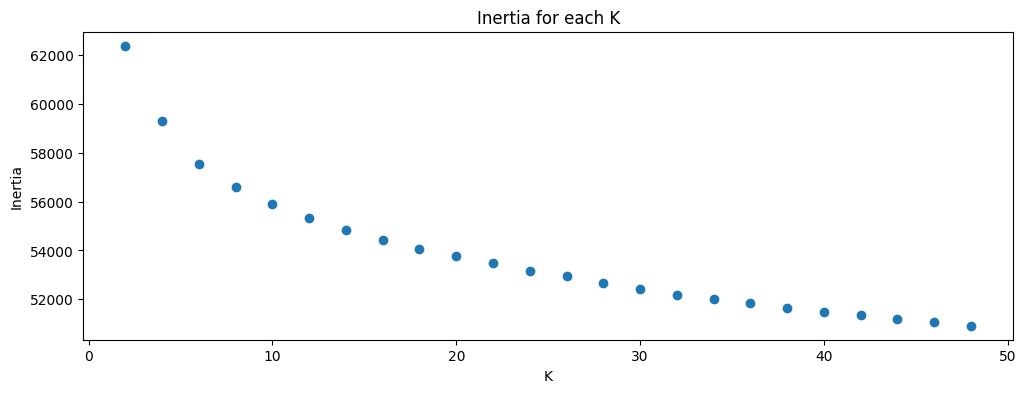

In [47]:
import matplotlib.pyplot as plt  
%matplotlib inline


def graw_elbow_graph(x: np.array, k1: int, k2: int, k3: int):
    k_values, inertia_values = [], []
    for k in range(k1, k2, k3):
        print("Processing:", k)
        n_init_value = 10
        km = KMeans(n_clusters=k,n_init=n_init_value).fit(x)
        k_values.append(k)
        inertia_values.append(km.inertia_)

    plt.figure(figsize=(12,4))
    plt.plot(k_values, inertia_values, 'o')
    plt.title('Inertia for each K')
    plt.xlabel('K')
    plt.ylabel('Inertia')


graw_elbow_graph(vectorized_docs, 2, 50, 2)

## Visualisation
draw all clusters on a 2D plane, use t-SNE (T-distributed Stochastic Neighbor Embedding) dimensionality reduction methods to reduce the number of dimensions to 2, and Bokeh to draw the results

## BERTopic
The above was a low-level analysis, now let's try using BERTopic.
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install bertopic